In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Country,City,ZipCode,Latitude,Longitude
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,United States,Los Angeles,90001,33.973616,-118.249020
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,No,United States,Los Angeles,90002,33.949255,-118.246978
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,United States,Los Angeles,90003,33.964131,-118.272783
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,United States,Los Angeles,90004,34.076259,-118.310715
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,United States,Los Angeles,90005,34.059281,-118.307420


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Country              object
City                 object
ZipCode               int64
Latitude            float64
Longitude           float64
dtype: object

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.50', '108.15', ..., '346.45', '306.60', '6844.50'],
      dtype=object)

In [ ]:
df['TotalCharges']=df['TotalCharges'].replace(r'^\s',float('NaN'),regex=True)

In [ ]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Country              0
City                 0
ZipCode              0
Latitude             0
Longitude            0
dtype: int64

In [ ]:
df['TotalCharges']=df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'])
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Country             0
City                0
ZipCode             0
Latitude            0
Longitude           0
dtype: int64

In [ ]:
df['TotalCharges']=df['TotalCharges'].astype(float,errors='raise')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['tenure','MonthlyCharges','TotalCharges']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF,Features
0,6.332328,tenure
1,3.355660,MonthlyCharges
2,8.075070,TotalCharges


In [ ]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
#df['PaperlessBilling'] = np.where(df['PaperlessBilling'] == 'Yes', 1, 0)
#df['OnlineSecurity'] = np.where(df['OnlineSecurity'] == 'Yes', 1, 0)
#df['PhoneService'] = np.where(df['PhoneService'] == 'Yes', 1, 0)
#df['InternetService']=df['InternetService'].replace('DSL',0)
#df['InternetService']=df['InternetService'].replace('Fiber optic',1)
#df['InternetService']=df['InternetService'].replace('No',2)
#df['customerID'] = df['customerID'].str.slice(5,6)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Country,City,ZipCode,Latitude,Longitude
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,0,United States,Los Angeles,90001,33.973616,-118.249020
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,0,United States,Los Angeles,90002,33.949255,-118.246978
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,1,United States,Los Angeles,90003,33.964131,-118.272783
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,0,United States,Los Angeles,90004,34.076259,-118.310715
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,1,United States,Los Angeles,90005,34.059281,-118.307420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Mailed check,84.80,1990.50,0,United States,Adelanto,92301,34.667815,-117.536183
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Credit card (automatic),103.20,7362.90,0,United States,Amboy,92304,34.559882,-115.637164
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Yes,Electronic check,29.60,346.45,0,United States,Angelus Oaks,92305,34.167800,-116.864330
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Yes,Mailed check,74.40,306.60,1,United States,Apple Valley,92307,34.550820,-117.122396


In [ ]:
new_data= df[['MonthlyCharges','PaperlessBilling','tenure','InternetService','OnlineSecurity','TotalCharges','Contract','PaymentMethod']]
new_data = pd.get_dummies(new_data,columns=['PaperlessBilling','InternetService','OnlineSecurity','Contract','PaymentMethod'])
new_data
#new_data['tenure'] = df['tenure']
#new_data['PhoneService'] = df['PhoneService']
#new_data['MonthlyCharges'] = df['MonthlyCharges']
#new_data
#data = df[['tenure','MonthlyCharges','TotalCharges']]
#data

,MonthlyCharges,tenure,TotalCharges,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,1,29.85,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
1,56.95,34,1889.50,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,53.85,2,108.15,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1
3,42.30,45,1840.75,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0
4,70.70,2,151.65,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,24,1990.50,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1
7039,103.20,72,7362.90,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0
7040,29.60,11,346.45,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0
7041,74.40,4,306.60,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1


0    5174
1    1869
Name: Churn, dtype: int64

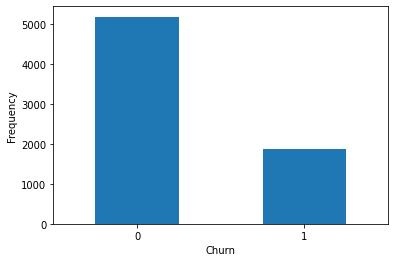

In [ ]:
count_churn=pd.value_counts(df['Churn'],sort=True)
count_churn.plot(kind='bar',rot=0)
plt.xticks(range(2),labels=[0,1])
plt.xlabel("Churn")
plt.ylabel("Frequency")
df.Churn.value_counts()

In [ ]:
X=new_data
y=df['Churn']

In [ ]:
from sklearn import metrics
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
#X_train = X[:5633]
#X_test = X[5634:7043]
#y_train = y[:5633]
#y_test = y[5634:7043]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))
print("Training accuracy",metrics.accuracy_score(y_train,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

Training accuracy 0.7951721689740859
Testing accuracy: 0.8112136266855926


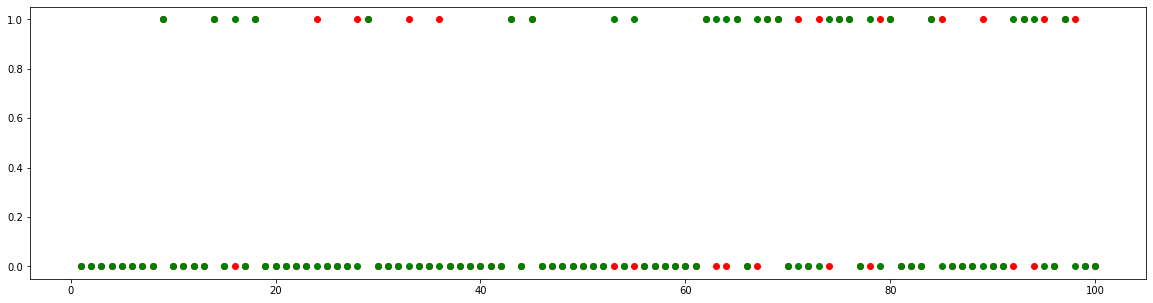

In [ ]:
y_pred.reshape(1409,1)
y_test.values.reshape(1409,1)
df1 = pd.DataFrame(columns=['y_pred','y_test'])
#df1 = df[5634:7043].copy()
df1['y_test'] = y_test
df1['y_pred'] = y_pred
df2 = df1.sample(n=100)
df2.insert(0,'dummy',range(1,101))
plt.figure(figsize=(20,5))
plt.scatter(df2.dummy,df2.y_test,color='red')
plt.scatter(df2.dummy,df2.y_pred,color='green')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 200]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 30, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'min_samples_split': min_samples_split,

               'min_samples_leaf': min_samples_leaf,

               'bootstrap': bootstrap}
model = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 3, cv =3, verbose=2, random_state=42)
rf_random.fit(X_train, y_train)
parameters = rf_random.best_params_
print(parameters)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total t

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 50,min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=15, bootstrap=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))
print("Training accuracy",metrics.accuracy_score(y_train,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.45      0.52       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409

Training accuracy 0.870784522541711
Testing accuracy: 0.7856635911994322


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))
print("Training accuracy",metrics.accuracy_score(y_train,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Training accuracy 0.8118565850195243
Testing accuracy: 0.8076650106458482


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=57)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))
print("Training accuracy",metrics.accuracy_score(y_train,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Training accuracy 0.8006744763933262
Testing accuracy: 0.8097941802696949


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_resample,y_resample = smote.fit_resample(X,y)
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_resample,y_resample, test_size=0.2, random_state=42)
#X_train_smote = X_resample[:8279]
#X_test_smote = X_resample[8279:]
#y_train_smote = y_resample[:8279]
#y_test_smote = y_resample[8279:]
#print(X_resample)
from collections import Counter
print("Before SMOTE: ",Counter(y_train))
print("After SMOTE: ",Counter(y_train_smote))

Before SMOTE:  Counter({0: 4138, 1: 1496})
After SMOTE:  Counter({0: 4153, 1: 4125})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 200]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 30, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'min_samples_split': min_samples_split,

               'min_samples_leaf': min_samples_leaf,

               'bootstrap': bootstrap}
model = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 3, cv =3, verbose=2, random_state=42)
rf_random.fit(X_train_smote, y_train_smote)
parameters = rf_random.best_params_
print(parameters)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total t

In [ ]:
model = RandomForestClassifier(n_estimators= 50,min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=15, bootstrap=True)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1021
           1       0.85      0.87      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

Training accuracy 0.8905532737376178
Testing accuracy: 0.8584541062801933


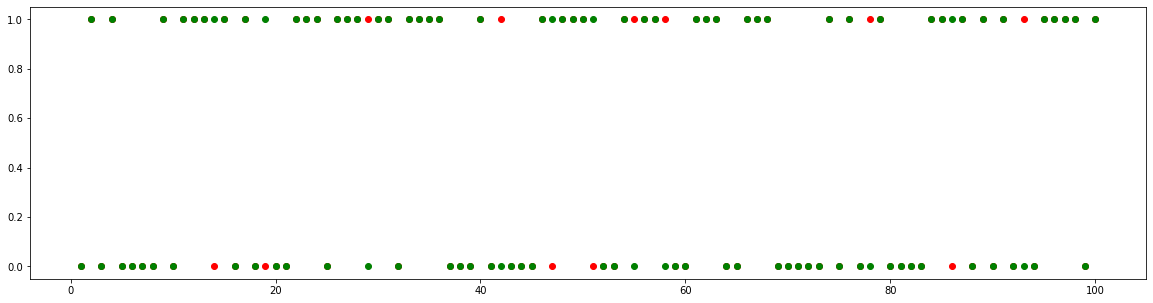

In [ ]:
y_pred.reshape(2070,1)
y_test_smote.values.reshape(2070,1)
df3 = pd.DataFrame(columns=['y_pred','y_test_smote'])
df3['y_test_smote'] = y_test_smote
df3['y_pred'] = y_pred
df4 = df3.sample(n=100)
df4.insert(0,'dummy',range(1,101))
plt.figure(figsize=(20,5))
plt.scatter(df4.dummy,df4.y_test_smote,color='red')
#plt.plot(df4.dummy,df4.y_test_smote)
plt.scatter(df4.dummy,df4.y_pred,color='green')
#plt.ylim(-1,2,1)
#plt.plot(df4.dummy,df4.y_pred)
#plt.show()

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1021
           1       0.85      0.85      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

Training accuracy 0.8425948296690021
Testing accuracy: 0.8478260869565217


In [ ]:
model = XGBClassifier()
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1021
           1       0.84      0.88      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.86      0.85      2070

Training accuracy 0.8572118869292099
Testing accuracy: 0.855072463768116


In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1021
           1       0.78      0.83      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

Training accuracy 0.9964967383425948
Testing accuracy: 0.7927536231884058


In [ ]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=10)
folds.get_n_splits(X)

10

In [ ]:
def get_score(model):
  for train_index, test_index in folds.split(X):
    model.fit(X_train_smote, y_train_smote)
    return model.score(X_test_smote,y_test_smote)

In [ ]:
print("Logistic regression model score: ",get_score(LogisticRegression(max_iter=1000)))
print("Random Forest model score: ",get_score(RandomForestClassifier(n_estimators= 50,min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=15, bootstrap=True,random_state=100)))
print("XGB Classifier model score: ",get_score(XGBClassifier()))
print("KNeighbors Classifier model score: ",get_score(KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1, weights= 'uniform')))

Logistic regression model score:  0.8478260869565217
Random Forest model score:  0.857487922705314
XGB Classifier model score:  0.855072463768116
KNeighbors Classifier model score:  0.8120772946859903
